# PCA

- Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df# 

In [1]:
# import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.shape

(178, 14)

In [4]:
df['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

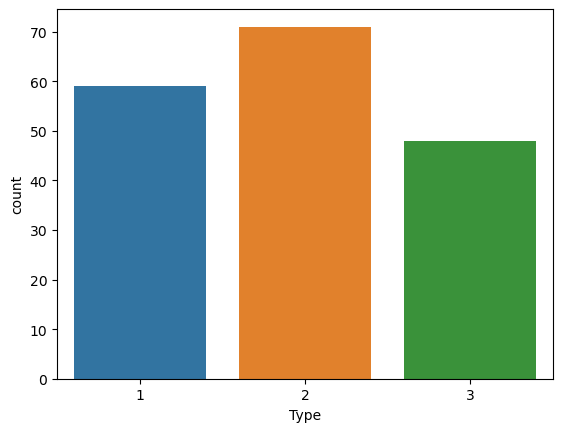

In [5]:
sns.countplot(df['Type'])

In [6]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
x=df.iloc[:,1:]
y=df['Type']

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [9]:
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
ypred=lg.predict(xtest)

In [10]:
from sklearn.metrics import classification_report

In [11]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.87      1.00      0.93        13
           3       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.94        36
weighted avg       0.95      0.94      0.95        36



# PCA

In [12]:
sc=StandardScaler()

x=sc.fit_transform(x)

In [13]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit_transform(x)
np.cumsum(pca.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

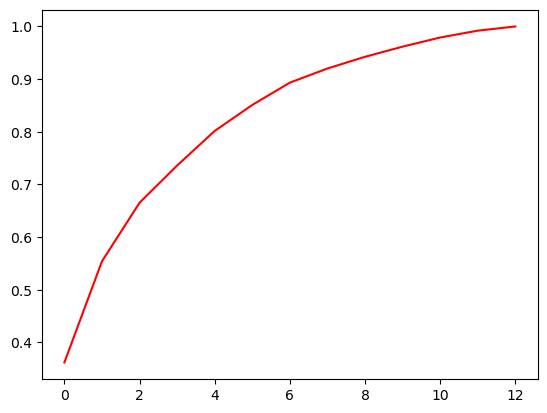

In [14]:
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='r')

In [15]:
pca = PCA(n_components=3)
pcs = pca.fit_transform(x)
pcs = pd.DataFrame(pcs,columns=['PC1','PC2','PC3'])

In [16]:
pcs

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


<AxesSubplot:>

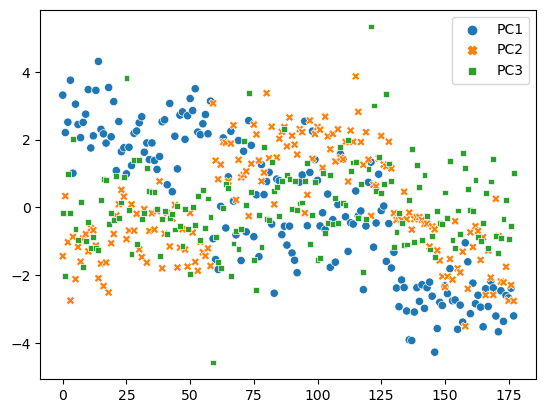

In [17]:
sns.scatterplot(data=pcs)

In [18]:
pcs['class'] = y

In [19]:
pcs

,PC1,PC2,PC3,class
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3
174,-2.601956,-1.757229,0.207581,3
175,-2.677839,-2.760899,-0.940942,3
176,-2.387017,-2.297347,-0.550696,3


In [20]:
x = pcs.iloc[:,:-1]
y = df['Type']

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [22]:
x

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [23]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



In [24]:
#checking with other clustering algorithms
#hierarchical clustering 
from scipy.cluster import hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [25]:
lk=sch.linkage(x,method='complete')

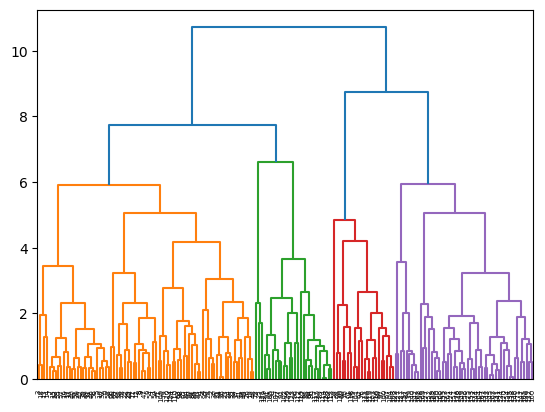

In [26]:
dendrogram=sch.dendrogram(lk)

In [27]:
#modal bulding
hc=AgglomerativeClustering(n_clusters=4)
ylabel=hc.fit_predict(x)
ylabel

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 3, 3, 3,
       0, 2, 2, 0, 2, 3, 3, 0, 3, 2, 2, 2, 0, 3, 2, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 2, 2, 2, 3, 3, 0, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 0, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [28]:
pcs['class']=y

In [29]:
pcs

,PC1,PC2,PC3,class
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3
174,-2.601956,-1.757229,0.207581,3
175,-2.677839,-2.760899,-0.940942,3
176,-2.387017,-2.297347,-0.550696,3


In [30]:
pcs.groupby("class").agg('mean')

,PC1,PC2,PC3
class,,,
1,2.282739,-0.967874,-0.159555
2,-0.038986,1.643483,0.261592
3,-2.748200,-1.241308,-0.190818
